In [11]:
import os
import pickle 
import sys
import random
import numpy as np
import matplotlib.pyplot as plt
import datetime
import math
import pandas as pd
import matplotlib.cm as cm
import matplotlib.colors as colors
from astropy.time import Time
from collections import defaultdict
sys.path.append(os.path.abspath('..'))

In [12]:
import sys
if '/Users/charlesc/Documents/GitHub/FSPSimulator' not in sys.path:
    sys.path.append('/Users/charlesc/Documents/GitHub/FSPSimulator')


### Function to load in the data from the simulations that have already been run

In [45]:
def load_file(simName):
    path = os.path.join(os.getcwd(), f'data/results/propagated_catalogs/{simName}.pickle')
    with open(path, 'rb') as f:
        # Load the data from the pickle file
        data = pickle.load(f)
        return data

In [128]:
spaceobjects1 = load_file('oneweb_starlink_batch_1') #load in the catalog
print(len(spaceobjects1))

88329


In [129]:
#attributes of the first space object
print(spaceobjects1[0].__dict__.keys())

dict_keys(['launch_date', 'decay_date', 'rso_name', 'rso_type', 'payload_operational_status', 'object_type', 'application', 'operator', 'characteristic_length', 'characteristic_area', 'mass', 'source', 'launch_site', 'maneuverable', 'spin_stabilized', 'apogee', 'perigee', 'propulsion_type', 'epoch', 'day_of_year', 'station_keeping', 'ephemeris', 'sma', 'orbital_period', 'inc', 'argp', 'raan', 'tran', 'eccentricity', 'meananomaly', 'cart_state', 'C_d', 'tle'])


In [ ]:
listofattrs = []
for object in spaceobjects1:
    listofattrs.append(object.source)

np.unique(listofattrs, return_counts=True)

(array(['False', 'y'], dtype='<U5'), array([41143, 43572]))

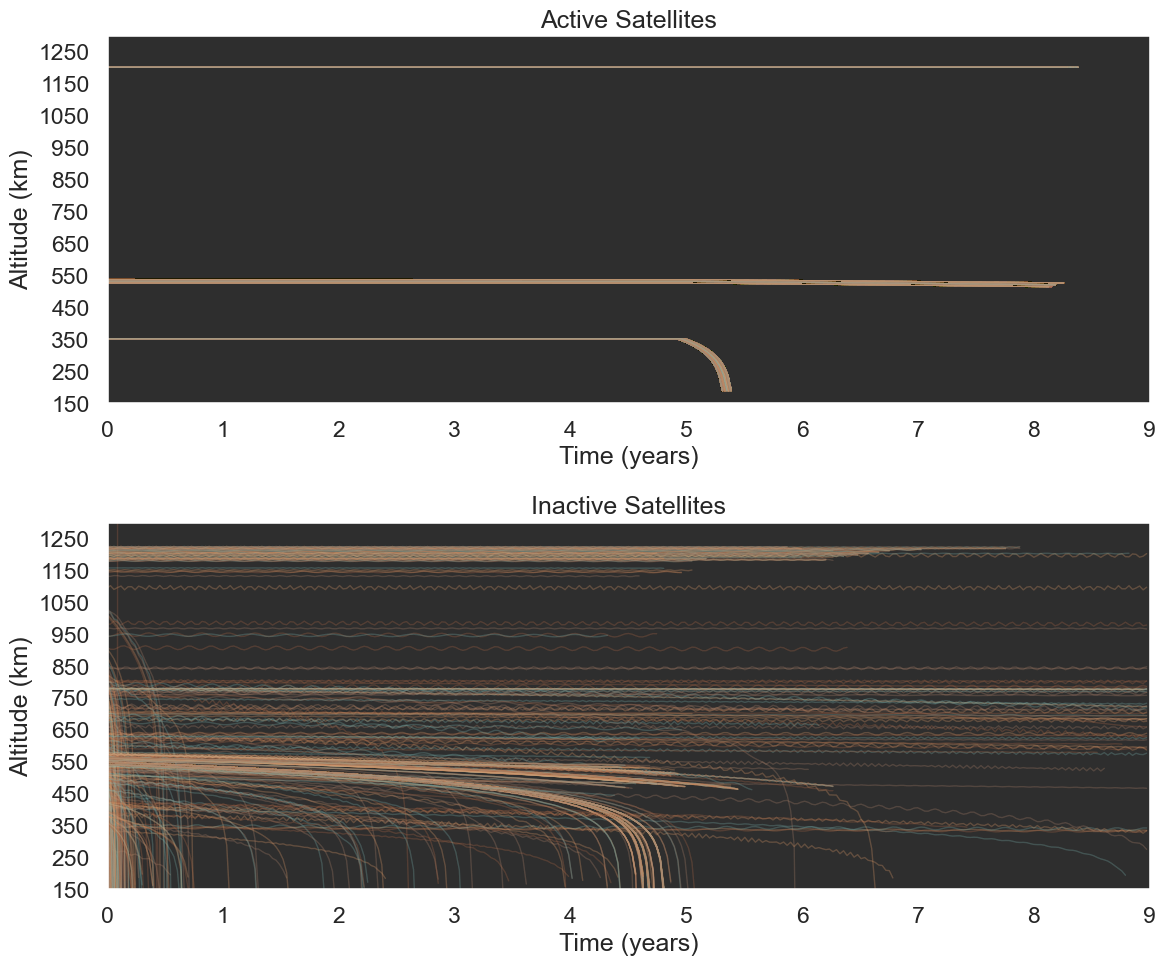

In [132]:
import matplotlib.pyplot as plt
import numpy as np

# Separate the space objects based on their maneuverable attribute
active_objects = [obj for obj in spaceobjects1[::10] if obj.maneuverable == 'y']
inactive_objects = [obj for obj in spaceobjects1[::10] if obj.maneuverable == 'False']

plt.figure(figsize=(12, 10))

# Define a function to plot objects
def plot_objects(ax, objects, title):
    for spaceobject in objects:
        if spaceobject.ephemeris is None or spaceobject.eccentricity > 0.001:
            continue
        times = [point[0] for point in spaceobject.ephemeris]
        times = [(time - times[0]) / 365.25 for time in times]
        positions = [np.array(point[1]) for point in spaceobject.ephemeris]
        altitudes = [np.linalg.norm(pos) - 6378.137 for pos in positions]

        ax.plot(times, altitudes, linewidth=1, alpha=0.1)
    ax.set_title(title)
    ax.set_xlabel('Time (years)')
    ax.set_ylabel('Altitude (km)')
    ax.set_ylim(150, 1300)
    ax.set_xlim(0, 9)
    ax.set_yticks(np.arange(150, 1300, 100))
    ax.grid()

# Create subplots for active and inactive objects
ax1 = plt.subplot(2, 1, 1)
plot_objects(ax1, active_objects, "Active Satellites")

ax2 = plt.subplot(2, 1, 2)
plot_objects(ax2, inactive_objects, "Inactive Satellites")

plt.tight_layout()
plt.show()


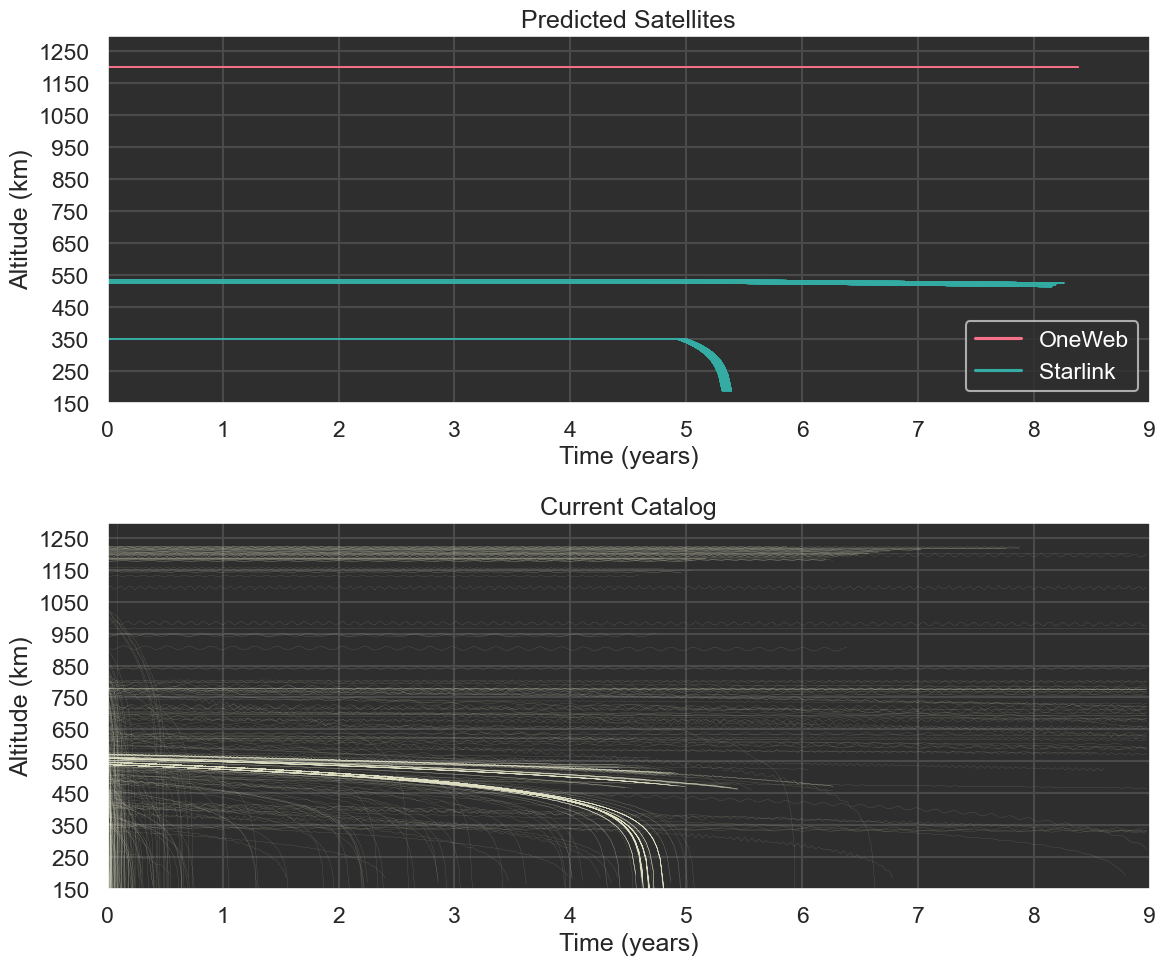

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the style and context to Seaborn's settings
sns.set_style("darkgrid", {'axes.facecolor': '#2E2E2E', 'grid.color': '#4A4A4A'})
sns.set_context("talk")
sns.set_palette("Paired")

# Separate the space objects based on their maneuverable attribute
active_objects = [obj for obj in spaceobjects1[::10] if obj.maneuverable == 'y']
inactive_objects = [obj for obj in spaceobjects1[::10] if obj.maneuverable == 'False']

# Generate a color map for operators
unique_operators = list(set([obj.operator for obj in active_objects]))
color_map = dict(zip(unique_operators, sns.color_palette("husl", len(unique_operators))))

plt.figure(figsize=(12, 10))

# Define a function to plot objects
def plot_objects(ax, objects, title, is_active=True):
    for spaceobject in objects:
        if spaceobject.ephemeris is None or spaceobject.eccentricity > 0.001:
            continue
        times = [point[0] for point in spaceobject.ephemeris]
        times = [(time - times[0]) / 365.25 for time in times]
        positions = [np.array(point[1]) for point in spaceobject.ephemeris]
        altitudes = [np.linalg.norm(pos) - 6378.137 for pos in positions]

        if is_active:
            ax.plot(times, altitudes, color=color_map[spaceobject.operator], linewidth=0.8, alpha=0.7)
        else:
            ax.plot(times, altitudes, color='xkcd:off white', linewidth=0.1, alpha=0.2)
    
    ax.set_title(title)
    ax.set_xlabel('Time (years)')
    ax.set_ylabel('Altitude (km)')
    ax.set_ylim(150, 1300)
    ax.set_xlim(0, 9)
    ax.set_yticks(np.arange(150, 1300, 100))

# Create subplots for active and inactive objects
ax1 = plt.subplot(2, 1, 1)
plot_objects(ax1, active_objects, "Predicted Satellites", True)

ax2 = plt.subplot(2, 1, 2)
plot_objects(ax2, inactive_objects, "Current Catalog", False)

# Create a legend for the active satellites
handles = [plt.Line2D([0], [0], color=color_map[operator], label=operator) for operator in unique_operators]
legend = ax1.legend(handles=handles)

# Set the text color of the legend to white
for text in legend.get_texts():
    text.set_color('white')

plt.tight_layout()
plt.show()

number of active objects:  14524
number of inactive objects:  14919


/var/folders/nh/9y501_nj2x56h2t3ch9_05f40000gn/T/ipykernel_26549/795489243.py:64: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/Users/charlesc/anaconda3/envs/fspsim/lib/python3.9/site-packages/IPython/core/pylabtools.py:137: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


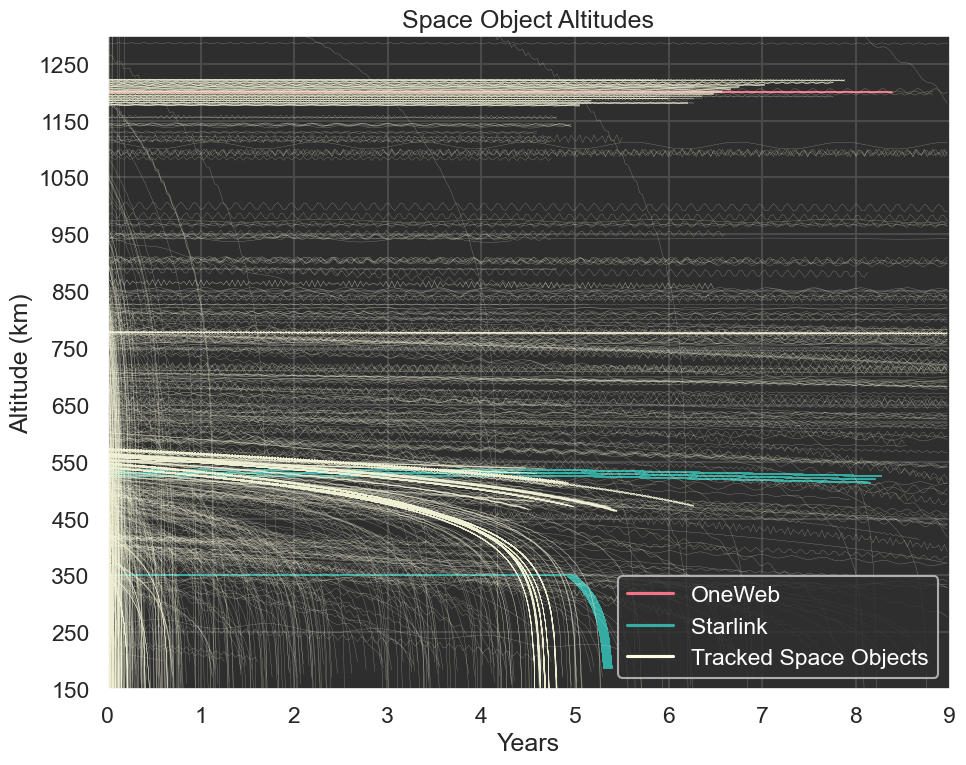

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the style and context to Seaborn's settings
sns.set_style("darkgrid", {'axes.facecolor': '#2E2E2E', 'grid.color': '#4A4A4A'})
sns.set_context("talk")
sns.set_palette("Paired")

# Separate the space objects based on their maneuverable attribute
active_objects = [obj for obj in spaceobjects1[::3] if obj.maneuverable == 'y']
inactive_objects = [obj for obj in spaceobjects1[::3] if obj.maneuverable == 'False']
print("number of active objects: ", len(active_objects))
print("number of inactive objects: ", len(inactive_objects))

# Generate a color map for operators
unique_operators = list(set([obj.operator for obj in active_objects]))
color_map = dict(zip(unique_operators, sns.color_palette("husl", len(unique_operators))))

plt.figure(figsize=(10, 8))

# Define a function to plot objects
def plot_objects(ax, active_objs, inactive_objs):
    for spaceobject in active_objs:
        if spaceobject.ephemeris is None:
            continue
        times = [point[0] for point in spaceobject.ephemeris]
        times = [(time - times[0]) / 365.25 for time in times]
        positions = [np.array(point[1]) for point in spaceobject.ephemeris]
        altitudes = [np.linalg.norm(pos) - 6378.137 for pos in positions]

        ax.plot(times, altitudes, color=color_map[spaceobject.operator], linewidth=0.8, alpha=0.7)

    for spaceobject in inactive_objs:
        if spaceobject.ephemeris is None or spaceobject.eccentricity > 0.001:
            continue
        times = [point[0] for point in spaceobject.ephemeris]
        times = [(time - times[0]) / 365.25 for time in times]
        positions = [np.array(point[1]) for point in spaceobject.ephemeris]
        altitudes = [np.linalg.norm(pos) - 6378.137 for pos in positions]

        ax.plot(times, altitudes, color='xkcd:off white', linewidth=0.2, alpha=0.2)
    
    ax.set_title("Space Object Altitudes")
    ax.set_xlabel('Years')
    ax.set_ylabel('Altitude (km)')
    ax.set_ylim(150, 1300)
    ax.set_xlim(0, 9)
    ax.set_yticks(np.arange(150, 1300, 100))

ax = plt.subplot(1, 1, 1)
plot_objects(ax, active_objects, inactive_objects)

# Create a legend for the satellites
handles_active = [plt.Line2D([0], [0], color=color_map[operator], label=operator) for operator in unique_operators]
handles_inactive = [plt.Line2D([0], [0], color='xkcd:off white', label="Tracked Space Objects")]
handles = handles_active + handles_inactive
legend = ax.legend(handles=handles)

# Set the text color of the legend to white
for text in legend.get_texts():
    text.set_color('white')

plt.tight_layout()
plt.show()

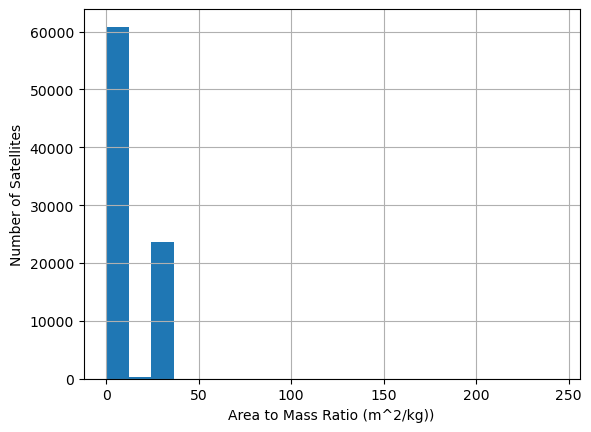

In [69]:
def area_to_mass_distribution():
    area_to_mass_ratios = []
    for sat in spaceobjects1:
        area_to_mass_ratios.append(sat.characteristic_area/sat.mass)
    plt.hist(area_to_mass_ratios, bins = 20)
    plt.xlabel('Area to Mass Ratio (m^2/kg))')
    plt.ylabel('Number of Satellites')
    plt.grid()

area_to_mass_distribution()

In [70]:
def time_to_decay_hist(step_size):
    #number of time steps until the altitude is less than 150km
    time_to_decay = []
    not_decayed_counter = 0
    for sat in spaceobjects:
        step_counter = 0
        for time in range(len(sat.ephemeris)):
            step_counter += 1
            if np.linalg.norm(sat.ephemeris[time][0:3])-6378.137 < 150:
                time_to_decay.append(time)
                break
        else:
            not_decayed_counter += 1
    plt.hist(time_to_decay, bins = 20)
    plt.xlabel('Time to Decay (time steps)')
    plt.ylabel('Number of Satellites')
    plt.grid()
    #text displaying the number of satellites that have not decayed
    plt.title( f'Number of satellites that have not decayed: {not_decayed_counter}')
    plt.show()
time_to_decay_hist(20)

NameError: name 'spaceobjects' is not defined

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def decay_graphs_individual():
    for sat in spaceobjects:
        sat_altitude = []
        if sat.eccentricity <0.1:
            for time in sat.ephemeris:
                sat_altitude.append(np.linalg.norm(time[0:3])-6378.137)

            plt.plot(range(len(sat_altitude)), sat_altitude, label=sat.rso_name)
            plt.xlabel('Time (time steps)')
            plt.ylabel('Altitude (km)')
            plt.title(f' {sat.rso_name}. \n Inc:{sat.inc}; Ecc:{sat.eccentricity}')  # adjusted title to include rso_name
            plt.legend()  # this displays the labels
            plt.show()  # moved inside the loop to plot each satellite separately

decay_graphs_individual()

/var/folders/nh/9y501_nj2x56h2t3ch9_05f40000gn/T/ipykernel_26549/4222119283.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Spectral')


TypeError: 'NoneType' object is not iterable

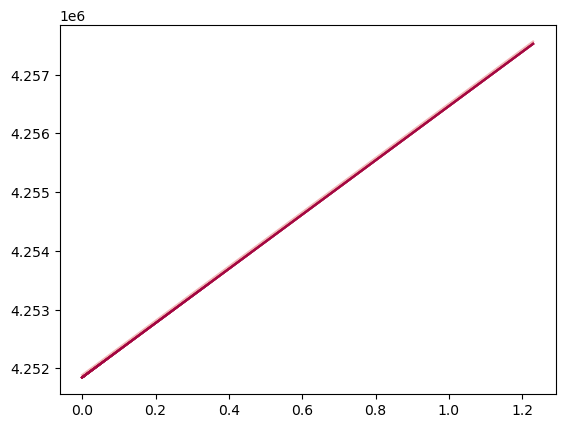

In [72]:


def decay_graphs_all(output_freq=360):
    # Create a color map
    cmap = cm.get_cmap('Spectral')

    # Calculate area to mass ratios and get maximum for normalization
    area_to_mass_ratios = [sat.characteristic_area / sat.mass for sat in spaceobjects1]
    max_ratio = max(area_to_mass_ratios)

    for i, sat in enumerate(spaceobjects1[::100]):
        sat_altitude = []
        times_in_days = []
        # Normalized ratio
        normalized_ratio = area_to_mass_ratios[i] / max_ratio
        # Convert the normalized ratio to a RGBA color
        color = cmap(normalized_ratio)

        # only include those with eccentricity less than 0.01
        for j, time in enumerate(sat.ephemeris):
            sat_altitude.append(np.linalg.norm(time[0:3])-6378.137)  # altitude in km
            times_in_days.append(j * output_freq / 86400)  # convert seconds to days
        plt.plot(times_in_days, sat_altitude, color=color, alpha=0.4)  # set transparency and color here

    # No need for a legend as color indicates the ratio
    plt.xlabel('Time Days')
    plt.ylabel('Altitude (km)')
    plt.title('Altitude of Satellites over Time by Area to Mass Ratio')
    plt.ylim(0, 2000)


    # create a scalar mappable for colorbar
    sm = cm.ScalarMappable(cmap=cmap, norm=colors.Normalize(vmin=min(area_to_mass_ratios), vmax=max_ratio))
    sm.set_array([])

    plt.colorbar(sm, label='Area to Mass Ratio')
    plt.show()

decay_graphs_all()

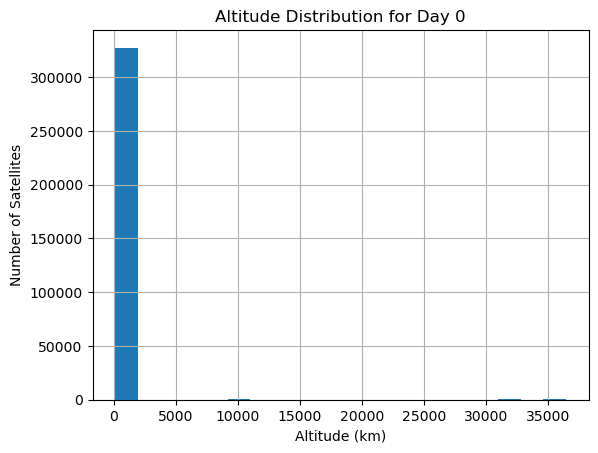

In [24]:
def altitude_distribution_daily(time_step=20):
    # Timesteps per day
    steps_per_day = 86400 / time_step 

    longest_ephemeris = 0
    for sat in spaceobjects:
        if len(sat.ephemeris) > longest_ephemeris:
            longest_ephemeris = len(sat.ephemeris)

    # create a list of lists to store the altitudes of each satellite for 24 hour periods
    altitudes = [[] for i in range(math.ceil(longest_ephemeris/steps_per_day))]

    # add the altitudes to the list of lists
    for sat in spaceobjects:
        for i in range(len(sat.ephemeris)):
            altitudes[math.floor(i/steps_per_day)].append(np.linalg.norm(sat.ephemeris[i][0:3])-6378.137)


    # plot the histogram for each day
    for i in range(len(altitudes)):
        if len(altitudes[i]) > 0: # add check for empty days
            plt.hist(altitudes[i], bins = 20)
            plt.xlabel('Altitude (km)')
            plt.ylabel('Number of Satellites')
            plt.title(f'Altitude Distribution for Day {i}')
            plt.grid()
            plt.show()

altitude_distribution_daily(20)

In [75]:
#now scatter plots of the starting and ending altitudes for each satellite
def decay_scatter():
    start_altitudes = []
    end_altitudes = []
    for sat in spaceobjects1:
        if sat.eccentricity < 0.1:
            start_altitudes.append(np.linalg.norm(sat.ephemeris[0][0:3])-6378.137)
            end_altitudes.append(np.linalg.norm(sat.ephemeris[-1][0:3])-6378.137)
            #catch error
            if np.linalg.norm(sat.ephemeris[-1][0:3])-6378.137 < 0:
                print(sat.rso_name)
        #xlim = (0, 10000)
        #ylim = (0, 10000)
        #plot a 1:1 line
    plt.plot([0, 10000], [0, 10000], color='black', linestyle='--', linewidth=1)
    plt.xlim(0, 2000)
    plt.ylim(0, 2000)
    plt.grid()
    plt.scatter(start_altitudes, end_altitudes, s=1, alpha=0.5)
    plt.xlabel('Starting Altitude (km)')
    plt.ylabel('Ending Altitude (km)')
    plt.title('Starting and Ending Altitudes of Satellites')
    plt.show()

In [76]:
decay_scatter()

TypeError: 'NoneType' object is not subscriptable

In [6]:
#attributes of a spaceobject
spaceobjects[0].__dict__.keys()

dict_keys(['launch_date', 'decay_date', 'rso_name', 'rso_type', 'payload_operational_status', 'object_type', 'application', 'operator', 'characteristic_length', 'characteristic_area', 'mass', 'source', 'launch_site', 'maneuverable', 'spin_stabilized', 'apogee', 'perigee', 'propulsion_type', 'epoch', 'day_of_year', 'station_keeping', 'tle', 'ephemeris', 'sma', 'orbital_period', 'inc', 'argp', 'raan', 'tran', 'eccentricity', 'meananomaly', 'altitude', 'cart_state', 'C_d'])

In [135]:
#number of objects with eccentricity > 0.1
# Currently: 3495
# these are problematic as we use perigee == altitude, but for non-ciruclar orbits this assumption is not valid and leads to issues with decay etc.
eccentricity = []
for i in range(len(spaceobjects)):
    eccentricity.append(spaceobjects[i].eccentricity)

eccentricity = np.array(eccentricity)
eccentricity[eccentricity > 0.1].shape

print("Number of objects with eccentricity > 0.1: ", eccentricity[eccentricity > 0.1].shape[0])

Number of objects with eccentricity > 0.1:  0


### BStar
This is how I got the median value of BStar to run the simulation with

In [136]:
def launch_date_histogram(spaceobjects):
    launch_dates = []
    for sat in spaceobjects:
        launch_dates.append(sat.launch_date)
    plt.hist(launch_dates, bins=100)
    plt.xlabel('Launch Date')
    plt.ylabel('Number of Satellites')
    plt.show()

In [137]:
def decay_date_histogram(spaceobjects):
    decay_dates = []
    never_decayed = 0
    for sat in spaceobjects:
        #if decay date is after 2999, 1, 1, this means it never decayed
        if sat.decay_date > datetime.datetime(2998, 1, 1):
            never_decayed += 1
        else:
            decay_dates.append(sat.decay_date)

    plt.hist(decay_dates, bins=100)
    plt.xlabel('Decay Date')
    #set xlim from 1960-2029
    plt.ylabel('Number of Satellites')
    print("Number of satellites that never decayed: ", never_decayed)
    plt.show()

In [77]:
launch_date_histogram(spaceobjects)

NameError: name 'launch_date_histogram' is not defined

Number of satellites that never decayed:  0


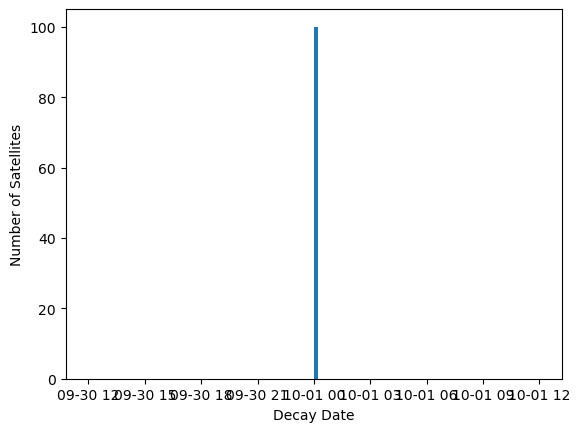

In [139]:
decay_date_histogram(spaceobjects)

### Orbital Highway Plots (inspired by Jah and McDowell Paper(reference))

In [13]:
def orbital_highway_plot(spaceobjects):
    for i in range(0,15, 1):
        new_altitudes = []
        for satellite in spaceobjects:
            if satellite.eccentricity < 0.1:
                try: 
                    new_altitudes.append(np.linalg.norm(satellite.ephemeris[i][-1]) - 6378) # take the last emepheris point
                except:
                    continue

        y_values = [random.random() for i in range(len(new_altitudes))]        
        plt.scatter(new_altitudes, y_values, alpha=0.5, s=0.1)
        plt.xlim(0, 2000)
        plt.xlabel('Altitude (km)')
        plt.ylabel('Random Value')
        plt.show()

### Check the starting vs ending altitude of all the satellites in the catalog. 
This is to see how they decay as a function of initial conditions

### Altitude time series plot for all satellites
This is a sanity check on the decay rates of the satellites

### Histogram of satellite areas in the catalog 
This allows us to infer what the predominant type is and serves as a sanity check

In [132]:
def area_hist(data):
    array_of_areas = [] # area of the satellite
    zero_area_count = 0
    for satellite in data:
        # if satellite.eccentricity > 0.1:
            area = satellite.characteristic_area
            array_of_areas.append(area)
            if area == 0:
                zero_area_count += 1
    print("zero area count: ", zero_area_count)
    plt.hist(array_of_areas, bins=100)
    plt.xlabel('Area (m^2)')
    plt.ylabel('Number of Satellites')
    plt.show()

In [57]:
SATCAT_after_prop = load_file('SATCAT_after_prop_optimistic')
for satellite in SATCAT_after_prop:
    try: 
        satellite.altitude = np.linalg.norm(satellite.ephemeris[-1][1]) - 6378 # take the last emepheris point
    except:
        continue

df = pd.DataFrame([vars(obj) for obj in SATCAT_after_prop])


In [61]:
df[(df['altitude'] >= 200) & (df['altitude'] <= 300) & (df['decay_date'].isna())]

,CATID,GUID,launch_date,decay_date,cospar_id,rso_name,rso_type,payload_operational_status,object_type,application,...,tran,eccentricity,meananomaly,altitude,atmos_density,C_d,bstar,no_kozai,sgp4epoch,cart_state
227,None,04a38ab1-f53d-4ab6-b2b7-44e193a24203,1961-06-29,NaT,1961-015CE,THOR ABLESTAR DEB,None,None,DEBRIS,Unknown,...,3.579865,0.003185,2.700611,236.578792,1.000000e-35,2.2,2.58730e-03,14.666344,26779,None
566,None,8f3b686f-030b-4b78-93de-3212c8fc9fd8,1963-06-27,NaT,1963-025B,HITCH HIKER 1,None,None,PAYLOAD,Unknown,...,1.505614,0.039138,1.427674,280.478127,1.000000e-35,2.2,6.18500e-04,15.016534,26778,None
2232,None,ddbdb460-cee0-474f-82ef-0ea4ae9d328a,1965-10-15,NaT,1965-082KR,TITAN 3C TRANSTAGE DEB,None,None,DEBRIS,Unknown,...,5.320287,0.009277,0.947728,269.113352,1.000000e-35,2.2,2.57480e-03,14.715777,26778,None
2784,None,f481dee9-338a-4291-8b9a-bb1f53bda2d5,1965-10-15,NaT,1965-082MY,TITAN 3C TRANSTAGE DEB,None,None,DEBRIS,Unknown,...,2.318190,0.000879,2.316900,295.243891,1.000000e-35,2.2,1.33560e-03,14.863556,26777,None
3486,None,23122761-939c-47be-9858-9f69ba507c75,1969-09-30,NaT,1969-082CP,THORAD AGENA D DEB,None,None,DEBRIS,Unknown,...,5.524347,0.003336,0.754256,265.640663,1.000000e-35,2.2,1.81480e-03,14.786135,26778,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54589,None,6d2526aa-3522-415b-9f18-4c3518166a52,None,NaT,UNKNOWN,TBA - TO BE ASSIGNED,None,None,UNKNOWN,Unknown,...,4.332257,0.005748,1.940237,213.792937,1.000000e-35,2.2,3.64000e-03,14.865168,26776,None
54590,None,3c7a4a78-347d-4f6d-bd6f-a13e6b7b5e7b,None,NaT,UNKNOWN,TBA - TO BE ASSIGNED,None,None,UNKNOWN,Unknown,...,5.147511,0.003257,1.129774,244.245012,1.000000e-35,2.2,2.02060e-03,15.023726,26358,None
54689,None,2c09cad5-79a5-4416-a99b-e663e805d9f7,None,NaT,UNKNOWN,TBA - TO BE ASSIGNED,None,None,UNKNOWN,Unknown,...,2.906017,0.004963,2.903692,231.367478,1.000000e-35,2.2,2.83220e-03,14.641171,26772,None
54863,None,636752c2-347b-4310-8fea-c1107b9f9b27,None,NaT,UNKNOWN,TBA - TO BE ASSIGNED,None,None,UNKNOWN,Unknown,...,3.792360,0.014967,2.472528,212.136302,1.000000e-35,2.2,9.70727e-03,14.198879,26777,None


In [ ]:
total = 0
for sat in SATCAT_after_prop:
    try:
        val = float(sat.mass)
        if val > 0:
            total += val
    except:
        continue

print(total)

49889197.92300162


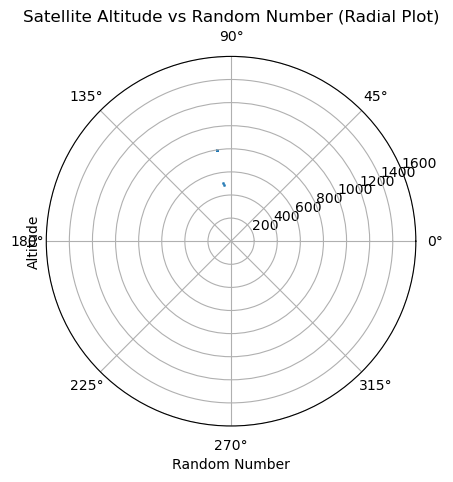

In [145]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Sample data
inclination = [satellite.inc for satellite in spaceobjects]
altitudes = [satellite.altitude for satellite in spaceobjects]

# Convert altitude and y values to polar coordinates
r = altitudes
# theta = 2 * np.pi * np.array(inclination)

# Create a polar scatter plot
ax = plt.subplot(111, projection='polar')
ax.scatter(inclination, r, s=1, alpha=0.25)

# Set the radial axis limit
ax.set_rlim(0, 1600)

# Add labels and title to the plot
ax.set_xlabel('Random Number')
ax.set_ylabel('Altitude')
ax.set_title('Satellite Altitude vs Random Number (Radial Plot)')

# Display the plot
plt.show()


NameError: name 'SATCAT_after_prop' is not defined

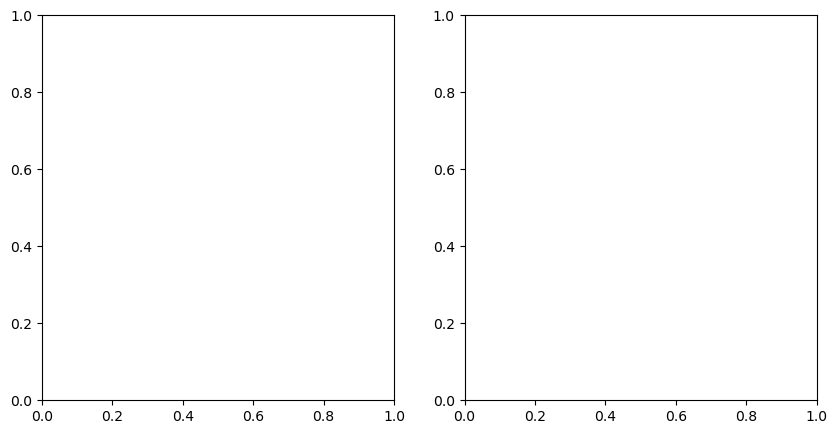

In [78]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
y_values = [random.random() for _ in SATCAT_after_prop]

altitudes = [satellite.altitude for satellite in SATCAT_after_prop]
# Create a histogram of the altitudes
ax1.hist(altitudes, bins=50, range=(0, 2000))

# Add labels and title to the plot
ax1.set_xlabel('Altitude')
ax1.set_ylabel('Frequency')
ax1.set_xlim(0, 2000)
ax1.set_title('Distribution of Satellite Altitudes')

# Plot the second chart on the second subplot
ax2.scatter(altitudes, y_values, s=0.1, alpha=0.3)

# Add labels and title to the plot
ax2.set_xlabel('Altitude')
ax2.set_ylabel('Random Number')
ax2.set_xlim(0, 3000)
ax2.set_title('Satellite Altitude vs Random Number')

# Display the plot
plt.show()

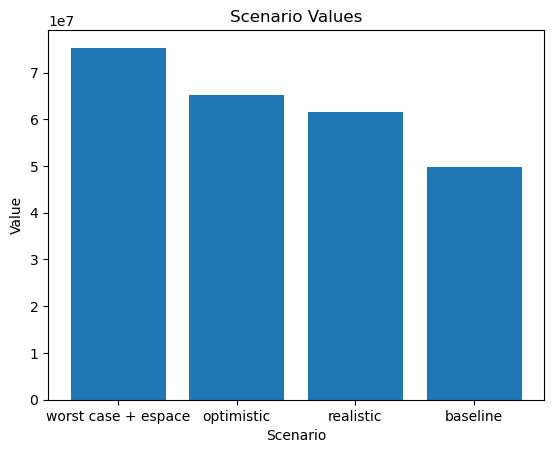

In [ ]:
data = {"worst case + espace": 75305977.92300162, "optimistic": 65264154.92300162, "realistic": 61552853.92300162, "baseline": 49889197.92300162}

# Create a bar chart
plt.bar(data.keys(), data.values())

# Add labels and title to the plot
plt.xlabel('Scenario')
plt.ylabel('Value')
plt.title('Scenario Values')

# Display the plot
plt.show()

### Orbital Density

Firstly, calculate the volume of the entire orbital shell, and then the total volume of all space objects at one given time. 

In [ ]:
orbital_shells = {}
orbital_shells_volume = {}

for i in range(0, 2001, 100):
    # Add a key-value pair to the dictionary
    orbital_shells[i] = 0
    orbital_shells_volume[i] = 0

for obj in SATCAT_after_prop:
    altitude = obj.altitude
    shell = math.ceil(altitude / 100) * 100 # get the nearest 100km shell
    # increase the value in the dictionary by 1 where the shell and key are the same
    if shell in orbital_shells:
        orbital_shells[shell] += 1


x = list(orbital_shells.keys())
y = list(orbital_shells.values())

plt.plot(x, y)
plt.xlabel('Orbital shell')
plt.ylabel('Number of objects')
plt.title('Number of objects in each orbital shell')
plt.show()

NameError: name 'SATCAT_after_prop' is not defined

In [79]:
# calculate the mass in each orbital shell
for obj in SATCAT_after_prop:
    altitude = obj.altitude
    shell = math.ceil(altitude / 100) * 100 # get the nearest 100km shell
    # increase the value in the dictionary by 1 where the shell and key are the same
    if shell in orbital_shells_volume:
        orbital_shells_volume[shell] += obj.characteristic_area * obj.characteristic_length

x = list(orbital_shells_volume.keys())
y = list(orbital_shells_volume.values())

plt.plot(x, y)
plt.xlabel('Orbital shell')
plt.ylabel('Total Volume')
plt.title('Total Volume in each orbital shell')
plt.show()
orbital_shells_volume


NameError: name 'SATCAT_after_prop' is not defined

In [130]:
volumes = {}
for shell in orbital_shells_volume:
    r1 = shell
    r2 = shell + 100
    volume = (4/3) * math.pi * (r2**3 - r1**3)
    density = orbital_shells_volume[shell] / volume
    volumes[shell] = density

x = list(volumes.keys())
y = list(volumes.values())

plt.plot(x, y)
plt.xlabel('Orbital shell')
plt.ylabel('Total Volume')
plt.title('Total Volume in each orbital shell')
plt.show()
orbital_shells_volume

NameError: name 'orbital_shells_volume' is not defined

### Vis-Viva Law
The vis-viva equation is a formula that relates the velocity of a spacecraft in orbit around a celestial body to the distance between the spacecraft and the body, as well as the mass of the body.

In [ ]:
total = 0
for obj in SATCAT_after_prop:
    # calcaulate the vis-viva equation
    gravity = 398600.4418
    v = math.sqrt(398600.4418 * obj.mass / (obj.altitude + 6378))

Vis-Viva law over time

In [33]:
years = ['2023', '2024', '2025', '2026', '2027', '2028']

# Convert the data list to a dataframe
df = pd.DataFrame([obj.__dict__ for obj in data])

# Loop through each satellite object in the dataframe
for i, row in df.iterrows():
    # Check the length of the ephemeris and the decay date
    if len(row['ephemeris']) == 6 and (pd.isna(row['decay_date'])):
        # Loop through each sub-list in the ephemeris list
        for j, ephemeris_point in enumerate(row['ephemeris']):
            # Compute the altitude for the current ephemeris point
            altitude = np.linalg.norm(ephemeris_point[1]) - 6378

            # Add the altitude to a new column in the dataframe
            year = years[j % len(years)]
            column_name = f'altitude_{year}'
            df.at[i, column_name] = altitude

In [34]:
df.head()

,CATID,GUID,launch_date,decay_date,cospar_id,rso_name,rso_type,payload_operational_status,object_type,application,...,bstar,no_kozai,sgp4epoch,cart_state,altitude_2023,altitude_2024,altitude_2025,altitude_2026,altitude_2027,altitude_2028
0,None,c36232d7-0b63-4ca9-bfe8-b02c14c7e93f,None,1970-03-31,1958-001A,EXPLORER 1,None,None,PAYLOAD,Unknown,...,0.00000e+00,16.275443,7395,None,NaN,NaN,NaN,NaN,NaN,NaN
1,None,3487fc86-9bec-4c07-8fc0-04556c2f7d72,1958-03-17,NaT,1958-002B,VANGUARD 1,None,None,PAYLOAD,Unknown,...,9.50240e-05,10.850798,26778,None,954.766252,2701.867823,3691.258457,3445.017231,1194.152977,3281.443111
2,None,129225be-af6c-4880-89ce-f9a6b07ba5b1,None,1960-04-06,1958-004B,SPUTNIK 3,None,None,PAYLOAD,Unknown,...,0.00000e+00,16.283259,3747,None,NaN,NaN,NaN,NaN,NaN,NaN
3,None,92a2fffe-a35f-4668-8f6d-cbe52d758bf0,None,1959-10-23,1958-005A,EXPLORER 4,None,None,PAYLOAD,Unknown,...,0.00000e+00,15.516105,3562,None,NaN,NaN,NaN,NaN,NaN,NaN
4,None,d1f67b02-8c8a-4631-83e7-b3bd4647fff9,1959-02-17,NaT,1959-001A,VANGUARD 2,None,None,PAYLOAD,Unknown,...,1.47020e-03,11.870405,26778,None,2853.737382,567.421068,904.906985,565.219197,694.318404,608.178252


### Final Calculations and Comparisons to Other Models
Here in the results folder, is all of the previous models that have been run. This code here will compare and analyse each of their results. 

1. A 4x4 comparison plot of the orbital highways. 
2. A 4x4 comparison radio plot of the orbital highways.
3. A policy breakdown of the vis-visa law. 
4. A policy breakdown of the orbital spatial density.

In [ ]:
# import os
# import pickle
# import random
# import matplotlib.pyplot as plt

# def get_alitudes(simName):
#     sys.path.append('D:/UCL/FSPSimulator')
#     with open(os.path.join(os.getcwd(), f'../../src/fspsim/data/catalogue/{simName}'), 'rb') as f:
#         # Load the data from the pickle file
#         data = pickle.load(f)
        
#     altitudes = [satellite.altitude for satellite in data]
#     y_values = [random.random() for i in range(len(altitudes))]
#     output = zip(altitudes, y_values, simName)
#     print(output)
#     return output

# # define the list of simNames
# simNames = ['SATCAT_after_prop_optimistic.pickle', 'SATCAT_after_prop_realistic.pickle',
#             'SATCAT_after_prop_worst_case.pickle', 'SATCAT_after_prop_baseline.pickle']

# all_altitudes = []
# for simName in simNames:
#     altitudes.append(get_alitudes(simName))

In [53]:
orbital_shells_vis_viva = []
orbital_shells_density = []
total_vis_viva = []
orbital_shells = {}
orbital_shells_volume = {}
for i in range(0, 2001, 100):
    # Add a key-value pair to the dictionary
    orbital_shells[i] = 0
    orbital_shells_volume[i] = 0


def get_alitudes(simName):
    with open(f'D:/UCL/FSPSimulator/src/fspsim/data/catalogue/{simName}', 'rb') as f:
        # Load the data from the pickle file
        data = pickle.load(f)

    for satellite in data:
        try: 
            satellite.altitude = np.linalg.norm(satellite.ephemeris[0][1]) - 6378 # take the last emepheris point
        except:
            continue
        
    altitudes = [satellite.altitude for satellite in data if pd.isna(satellite.decay_date) or satellite.decay_date > datetime.datetime(2028, 12, 31) and satellite.decay_date < datetime.datetime(2030, 1, 1)]
    y_values = [random.random() for i in range(len(altitudes))]
    output = [altitudes, y_values]

    temp = {}
    density_temp = {}
    vis_viva_total = 0

    # also calculate the vis viva equation
    for i in range(0, 2001, 100):
        # Add a key-value pair to the dictionaries
        temp[i] = 0
    for obj in data:
        shell = math.ceil(obj.altitude / 100) * 100 # get the nearest 100km shell
        
        # increase the value in the dictionary by 1 where the shell and key are the same
        if shell in orbital_shells:            
            # calculate vis viva and add to the value in the dictionary
            gravity = 398600.4418
            if math.isnan(obj.mass):
                vis_viva = math.sqrt(gravity * 12 / (obj.altitude + 6378))
            else:
                vis_viva = math.sqrt(gravity * obj.mass / (obj.altitude + 6378))
            temp[shell] += vis_viva
            vis_viva_total += vis_viva
    
    # then based on the temp shells, calculate the total spatial density
    for shell in temp:
        r1 = shell
        r2 = shell + 100
        volume = (4/3) * math.pi * (r2**3 - r1**3)
        density = temp[shell] / volume
        density_temp[shell] = density
    
    orbital_shells_vis_viva.append(temp)
    orbital_shells_density.append(density_temp)
    total_vis_viva.append([simName, vis_viva_total])

    return output

# define the list of simNames
simNames = ['SATCAT_after_prop_baseline.pickle', 'SATCAT_after_prop_realistic.pickle',
            'SATCAT_after_prop_optimistic.pickle', 'SATCAT_after_prop_worst_case.pickle']
all_altitudes = []
for simName in simNames:
    all_altitudes.append(get_alitudes(simName))

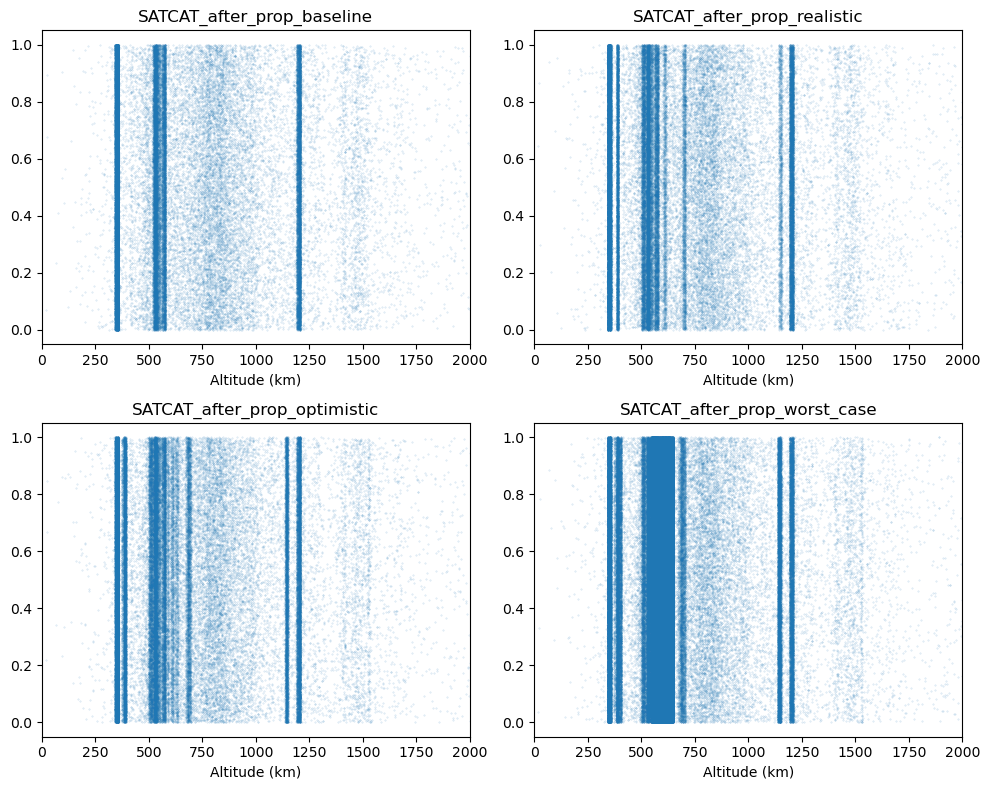

In [54]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
for i in range(2):
    for j in range(2):
        idx = 2*i+j
        x, y = all_altitudes[idx][0], all_altitudes[idx][1]
        axs[i, j].scatter(x, y, alpha=0.25, s=0.1)
        axs[i, j].set_xlim(0, 2000)
        axs[i, j].set_xlabel('Altitude (km)')
        axs[i, j].set_title(simNames[idx].replace('.pickle', ''))

plt.tight_layout()
plt.show()

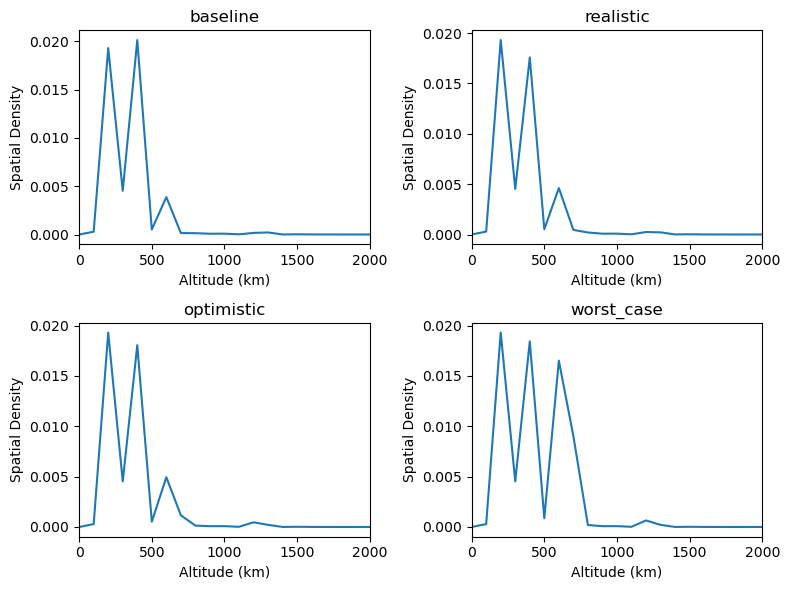

In [55]:
# Create a 2 x 2 plot
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))

# Loop through the list of dictionaries and plot a line graph for each
for i in range(len(orbital_shells_density)):
    x = list(orbital_shells_density[i].keys())
    y = list(orbital_shells_density[i].values())
    axs[i // 2, i % 2].plot(x, y)
    axs[i // 2, i % 2].set_title(f'{simNames[i].replace(".pickle", "").replace("SATCAT_after_prop_", "")}')
    axs[i // 2, i % 2].set_xlabel('Altitude (km)')
    axs[i // 2, i % 2].set_ylabel('Spatial Density')
    axs[i // 2, i % 2].set_xlim(0, 2000)

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

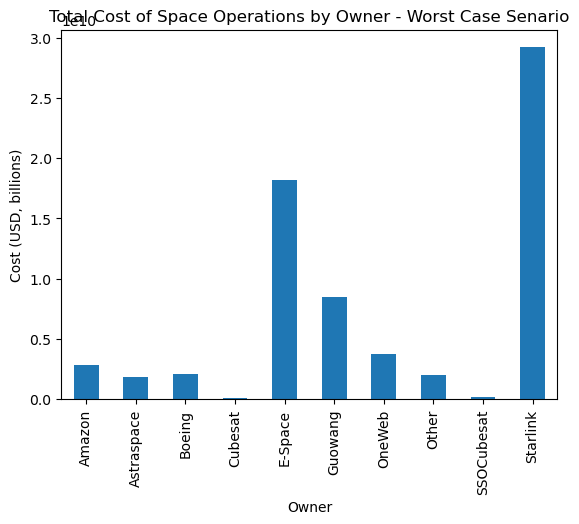

In [56]:
# plot economic scenarios
import pandas as pd
df = pd.read_csv('D:/UCL/FSPSimulator/src/fspsim/data/results/SATCAT_after_prop_worst_case.csv')


grouped = df.groupby('_owner').sum()

ax = grouped.plot(kind='bar', y='total_cost', legend=None)

# Set the labels for the x and y axes and the title of the plot
ax.set_xlabel('Owner')
ax.set_ylabel('Cost (USD, billions)')
ax.set_title('Total Cost of Space Operations by Owner - Worst Case Senario')

# Show the plot
plt.show()



In [3]:
from fspsim.utils.Conversions import car2kep
x = 3.759056926449344e7
y = 1824647.285968774
z = 6562405.524693076
u = -632.0474359801445
v = 2828.0519371863306
w = -1422.5243099775166
a,e,i,w,W,V  = car2kep(x,y,z,u,v,w)
print(a,e,i,w,W,V)

: 

: 

##